
# Decision Tree Classifier



# Import Necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv( 'car_acceptability.csv')
df

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


# Exploratory data analysis

In [ ]:
df.shape

(1727, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### View top 5 rows of dataset

In [ ]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### View summary of dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

In [ ]:
for col in df.columns:
    print(df[col].value_counts())
    print('****************')


buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
****************
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
****************
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
****************
persons
4       576
more    576
2       575
Name: count, dtype: int64
****************
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
****************
safety
med     576
high    576
low     575
Name: count, dtype: int64
****************
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64
****************


In [ ]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

### Missing values in variables

In [ ]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [ ]:
x = df.drop(['class'], axis=1)
x

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high
...,...,...,...,...,...,...
1722,low,low,5more,more,med,med
1723,low,low,5more,more,med,high
1724,low,low,5more,more,big,low
1725,low,low,5more,more,big,med


In [ ]:
y = df['class']

# Feature Engineering

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power

### Encode categorical variables

In [ ]:
# import category encoders

from sklearn.preprocessing import LabelEncoder
Lab_en=LabelEncoder()
for i in x.columns:
    x[i]=Lab_en.fit_transform(x[i])

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int32
 1   maint     1727 non-null   int32
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int32
 5   safety    1727 non-null   int32
dtypes: int32(6)
memory usage: 40.6 KB


### Train_Test_split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1381, 6), (346, 6), (1381,), (346,))

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(criterion='gini')

model.fit(x_train, y_train)

DecisionTreeClassifier()

### Check for overfitting and underfitting

In [ ]:
print("Train scores:",model.score(x_train,y_train))
print("Test scores:",model.score(x_test,y_test))

Train scores: 1.0
Test scores: 0.9855491329479769


### Visualize decision-trees

[Text(0.5721293604651163, 0.9666666666666667, 'x[3] <= 0.5\ngini = 0.461\nsamples = 1381\nvalue = [306.0, 59.0, 963.0, 53.0]'),
 Text(0.5605014534883721, 0.9, 'gini = 0.0\nsamples = 455\nvalue = [0, 0, 455, 0]'),
 Text(0.5837572674418605, 0.9, 'x[5] <= 0.5\ngini = 0.583\nsamples = 926\nvalue = [306, 59, 508, 53]'),
 Text(0.32776162790697677, 0.8333333333333334, 'x[0] <= 2.5\ngini = 0.645\nsamples = 310\nvalue = [161.0, 28.0, 68.0, 53.0]'),
 Text(0.17877906976744187, 0.7666666666666667, 'x[0] <= 0.5\ngini = 0.634\nsamples = 232\nvalue = [124.0, 28.0, 27.0, 53.0]'),
 Text(0.046511627906976744, 0.7, 'x[1] <= 2.5\ngini = 0.41\nsamples = 73\nvalue = [52, 0, 21, 0]'),
 Text(0.03488372093023256, 0.6333333333333333, 'x[2] <= 0.5\ngini = 0.071\nsamples = 54\nvalue = [52, 0, 2, 0]'),
 Text(0.023255813953488372, 0.5666666666666667, 'x[4] <= 1.5\ngini = 0.245\nsamples = 14\nvalue = [12, 0, 2, 0]'),
 Text(0.011627906976744186, 0.5, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0, 0]'),
 Text(0.0348837

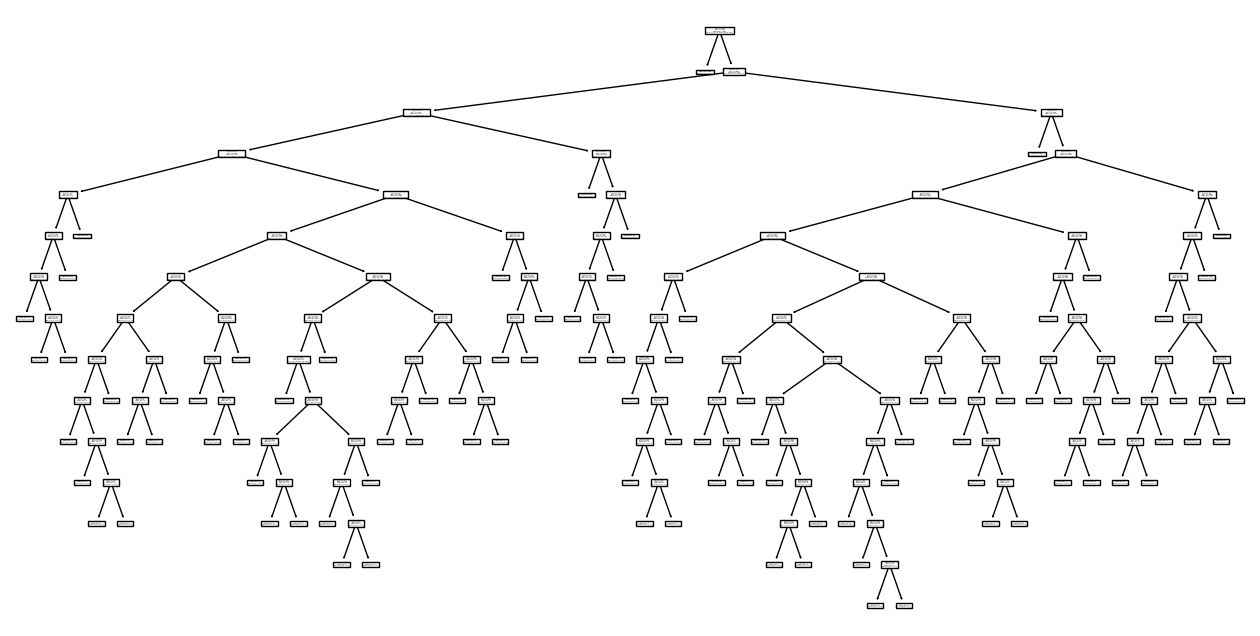

In [ ]:
plt.figure(figsize=(16,8))

from sklearn import tree


tree.plot_tree(model.fit(x_train, y_train))

# Model Evaluation

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[ 75   0   3   0]
 [  0  10   0   0]
 [  1   1 244   0]
 [  0   0   0  12]]


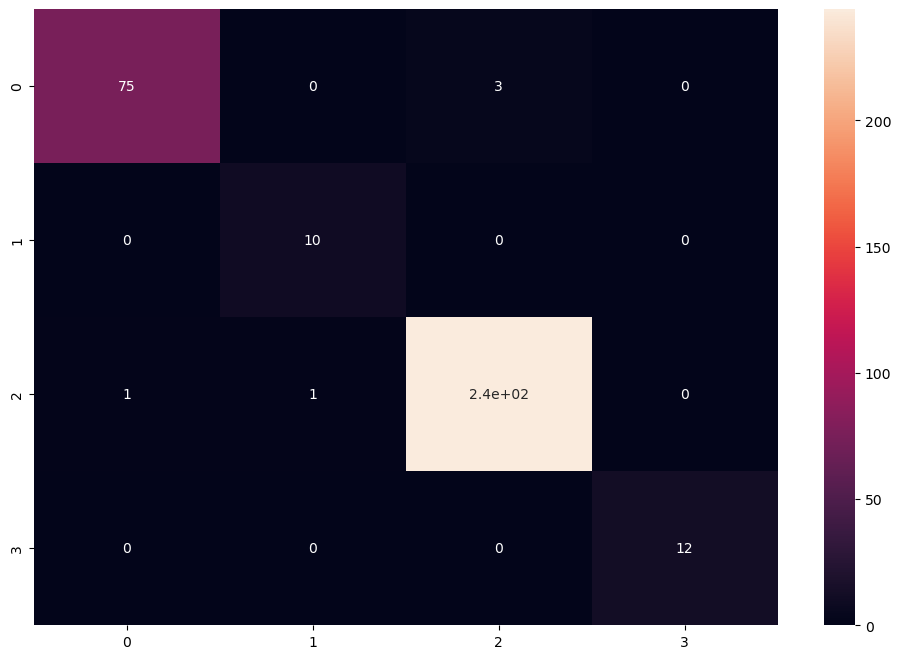

In [ ]:
plt.figure(figsize=(12,8))
sn.heatmap(cm,annot=True)
plt.show()

# Exercise